<a href="https://colab.research.google.com/github/martinpius/Practical_1/blob/main/DAY_6_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # For Data manipulation
import numpy as np # For Computations/Data manipulation
#from sklearn.datasets import fetch_california_housing # Sample data
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plottings
from sklearn.model_selection import train_test_split # For data spliting
from sklearn.preprocessing import StandardScaler# For Data normalization

# For classical ML
from sklearn.svm import SVR # For Modeling (Support Vector Machine for Regression)
from sklearn.ensemble import RandomForestRegressor # Random Forest regression
from sklearn.tree import DecisionTreeRegressor # DT regression
from sklearn.metrics import mean_squared_error # Evaluation metric
from statsmodels.graphics.gofplots import qqplot # Checking assumpltions LR-models
from scipy import stats # For statistical modeling
import statsmodels.api as sm # For statistical modeling
from sklearn.linear_model import LinearRegression # For LR
from sklearn.metrics import root_mean_squared_error, r2_score # Metrics
from sklearn.linear_model import Ridge, Lasso # Regularized reg
from sklearn.model_selection import cross_val_score #For robust eval
# For time series Analysis we use the following packages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Ploting
from statsmodels.tsa.stattools import adfuller# Statistical testing
from statsmodels.tsa.arima.model import ARIMA # Modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error # TS metrics
from statsmodels.tsa.seasonal import seasonal_decompose# To decompose the TS
from statsmodels.tsa.statespace.sarimax import SARIMAX # Modeling
import json # Saving .json--> rich text fmt
#from fpdf import FPDF # report creation
from ipywidgets import interact # To create interactive plots
import plotly.express as px # To create interactive plots

In [4]:
import statsmodels.api as sm

In [ ]:
#!pip install "name of your library" # For new installation

In [5]:
url = "https://raw.githubusercontent.com/martinpius/PG_training/refs/heads/main/boston_housing.csv"

In [6]:
dfm = pd.read_csv(url)

In [7]:
display(dfm.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


Variables descriptions:
columns = [
"CRIM", # Per capita crime rate by town
"ZN", # Proportion of residential land zoned for lots over 25,000 sq. ft.
"INDUS", # Proportion of non-retail business acres per town
"CHAS", # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
"NOX", # Nitric oxide concentration (parts per 10 million)
"RM", # Average number of rooms per dwelling
"AGE", # Proportion of owner-occupied units built before 1940
"DIS", # Weighted distances to five Boston employment centers
"RAD", # Index of accessibility to radial highways
"TAX", # Full-value property tax rate per $10,000
"PTRATIO", # Pupil-teacher ratio by town
"B", # 1000(Bk - 0.63)^2 where Bk is the proportion of Black individuals by town
"LSTAT" # Percentage of lower status population

In [9]:
X = dfm.iloc[:, :-1] # Fetch covariates

In [10]:
X.shape

(506, 13)

In [ ]:
# Prepare data for LR
# lm: y = beta_0 + beta1_1* X1 + etc, + eps

In [11]:
X = sm.add_constant(X)  # Adds intercept term

In [12]:
X.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:

y = dfm['MEDV'] #Price of the house

In [14]:
# Fit the LR model
model = sm.OLS(y, X).fit()# Fitting linear reg using ordinary least square

In [16]:
model.resid[:6]# Print out few values for the residuals

,0
0,-6.003843
1,-3.425562
2,4.132403
3,4.792964
4,8.256476
5,3.443716


In [17]:
print(model.summary()) # Print model summary: TODO-> Intepreate it

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 May 2025   Prob (F-statistic):          6.72e-135
Time:                        20:27:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [18]:
model.conf_int(alpha = 0.05) # Fetch CI for the parameter estimates

,0,1
const,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


In [19]:
# Confidence intervals for the regression coeff
# Get 95% CI for coefficients
conf_int = model.conf_int(alpha=0.05)


In [20]:
conf_int.columns = ['2.5%', '97.5%'] # Two tailed test [L=0.05/2, R = 1-alpha/2]
print("\nConfidence Intervals:")
print(conf_int)


Confidence Intervals:
              2.5%      97.5%
const    26.432226  46.486751
CRIM     -0.172584  -0.043438
ZN        0.019449   0.073392
INDUS    -0.100268   0.141385
CHAS      0.993904   4.379563
NOX     -25.271634 -10.261589
RM        2.988727   4.631004
AGE      -0.025262   0.026647
DIS      -1.867455  -1.083679
RAD       0.175692   0.436407
TAX      -0.019723  -0.004946
PTRATIO  -1.209795  -0.695699
B         0.004034   0.014589
LSTAT    -0.624404  -0.425113


In [21]:
from statsmodels.graphics.gofplots import qqplot #

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

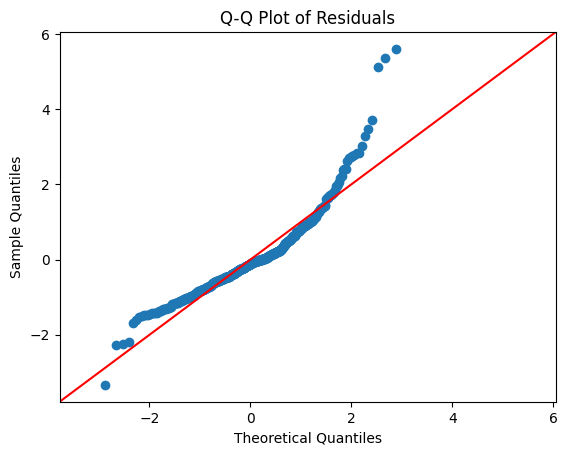

In [22]:
# Checking the Assumptions for LR

#---> Normality assumption
residuals = model.resid # Fetch the residuals
qqplot(residuals, line='45', fit=True) # Plot the residuals --> q-q plot
plt.title('Q-Q Plot of Residuals')
# Try a transformation of the target variable (e.g., log, square root) if not normal


In [ ]:
# TODO--> Intepreate and rectify the violation of assumptions if any from the above plot

Text(0.5, 1.0, 'Residuals vs Fitted Values')

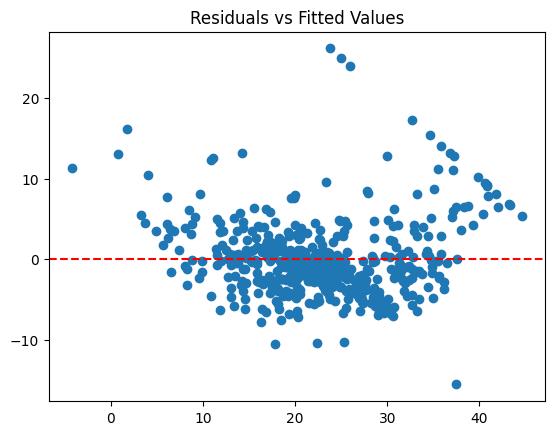

In [24]:
#---> Homoscedasticity--# Must be random above and below
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
#plt.axvline(x = 300000, color ="g", linestyle = "--")
plt.title('Residuals vs Fitted Values')
#TODO: HW--> Apply log or square-root transformation to the dependent variable.
#TODO: HW--> Use weighted least squares (WLS).[When Violeted]

In [ ]:
# TODO--> Inteprate the above, fix the violation if any

In [ ]:
#==============================================================

In [ ]:
#===============================================================

# Day 5: Predictive Modeling with Scikit-learn - California Housing

Text(0.5, 1.02, 'Correlation heatmap')

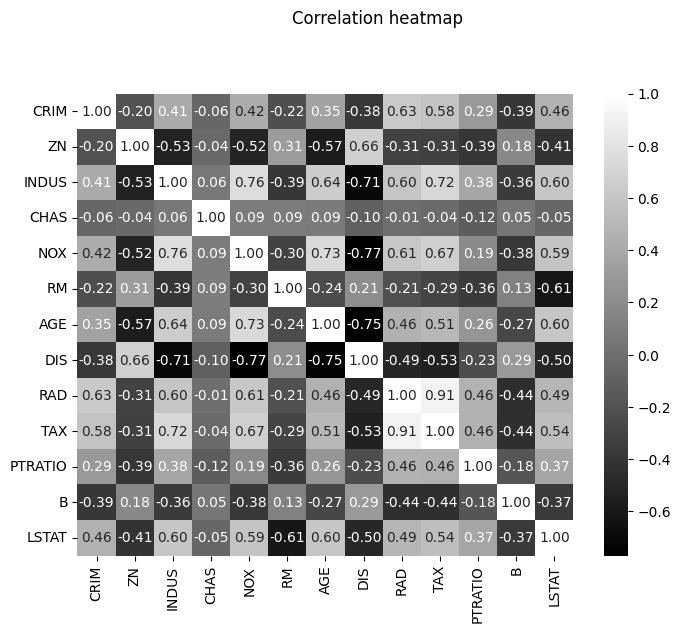

In [25]:
# Plot the correlation hitmap for the covariates
plt.figure(figsize = (8, 6))
sns.heatmap(data = dfm.iloc[:,:-1].corr(), cmap= "gray",
            fmt = ".2f", annot = True)
plt.suptitle("Correlation heatmap", y = 1.02)
# TODO--> HW: Mask the use the upper-triangular mat

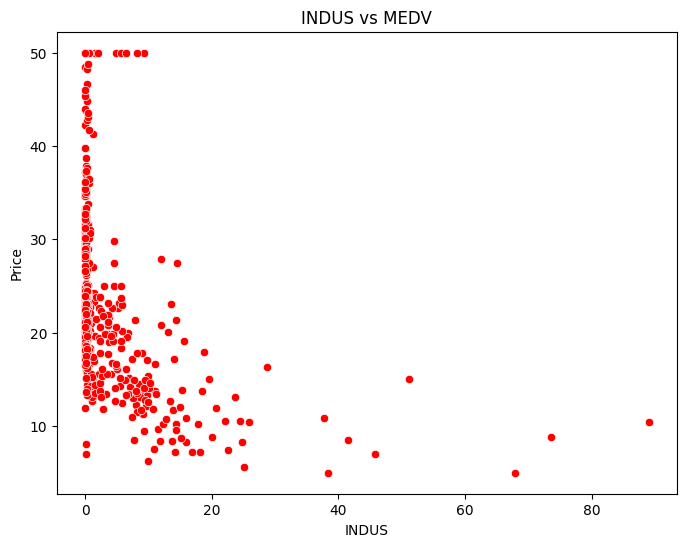

In [26]:
# Relationships [predictors and target]

plt.figure(figsize = (8, 6))
sns.scatterplot(data = dfm, x = "CRIM", y = "MEDV", color = "red")
plt.title("INDUS vs MEDV")
plt.xlabel("INDUS")
plt.ylabel("Price")
plt.show()
#TODO--> Perform EDA like in previous DAY

In [27]:
columns = list(dfm.columns)
indcols = columns[:-1] # Independent columns


In [28]:
X = dfm[indcols]

In [29]:
y = dfm["MEDV"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Machine learning procedure

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 219131, test_size = 0.3, shuffle = True)

In [34]:
reg_model = LinearRegression()

In [35]:
reg_fit = reg_model.fit(X = Xtrain, y = ytrain) # Fit the LR model

In [36]:
preds = reg_fit.predict(Xtest)

In [37]:
Rsquare = r2_score(ytest, preds)

In [38]:
Rsquare

0.7316537131383913

In [39]:

Rsquare = r2_score(ytest, preds)

In [40]:

reg_fit.coef_

array([-1.30579045e-01,  3.94077678e-02, -1.68707857e-02,  2.62805852e+00,
       -1.96108751e+01,  3.11632274e+00,  2.05638797e-02, -1.42530361e+00,
        3.29788321e-01, -1.19239665e-02, -1.01996136e+00,  9.59251989e-03,
       -5.98159091e-01])

In [41]:

mse = mean_squared_error(ytest, preds)

In [42]:
Rsquare

0.7316537131383913

In [43]:
mse

21.69135211050224

In [44]:

rmse = root_mean_squared_error(ytest, preds)

In [45]:

rmse

4.6573975684390785

In [ ]:
# TODO--> Intepreate the above results

In [ ]:
# Use regularized reg for improvement (if any)

# LASSO:Least Absolute Shrinkage and Selection Operator
# L1.2-norm
# TODO-> Check regularized regression: Ridge (L2), LASSO- L1.2

In [ ]:
# l = A + alpha * sum(Beta**2)

In [46]:

# Ridge Regression
ridge = Ridge(alpha= 0.1) # alpha is Regularized parameter
ridge.fit(Xtrain, ytrain)
ridge_rmse = mean_squared_error(ytest, ridge.predict(Xtest))

In [47]:
preds = ridge.predict(Xtest)

In [49]:
preds.shape

(152,)

In [53]:
ridge_rmse

21.637599063467007

Text(0.5, 1.0, 'Predictions plot')

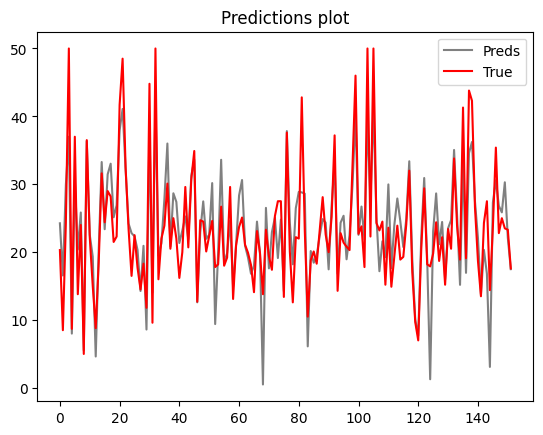

In [52]:
plt.plot(np.arange(len(preds)),preds, color = "gray", label= "Preds")

plt.plot(np.arange(len(preds)), ytest, color = "red", label = "True")
plt.legend()
plt.title("Predictions plot")

In [54]:

# Lasso Regression
lasso = Lasso(alpha= 0.0003)
lasso.fit(Xtrain, ytrain)
lasso_rmse = mean_squared_error(ytest, lasso.predict(Xtest))

print(f"Ridge RMSE: ${ridge_rmse:,.4f}")
print(f"Lasso RMSE: ${lasso_rmse:,.4f}")

Ridge RMSE: $21.6376
Lasso RMSE: $21.6886


In [55]:
# 5-fold cross-validation for Ridge
ridge_scores = cross_val_score(
    Ridge(alpha=1.0), # Any model[reg, ridge, lasso]
    Xtrain,
    ytrain,
    scoring='neg_root_mean_squared_error',
    cv=5
)


In [56]:
print(f"Ridge CV RMSE: ${-ridge_scores.mean():,.0f} (±${ridge_scores.std():,.0f})")

Ridge CV RMSE: $5 (±$1)


In [ ]:
# TODO-->Model selection/Interpretation

In [57]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'LR': reg_fit.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}).set_index('Feature')

print("Feature Coefficients:")
coeffs.style.format("{:,.5f}")

Feature Coefficients:


,LR,Ridge,Lasso
Feature,,,
CRIM,-0.13058,-0.12988,-0.13053
ZN,0.03941,0.03967,0.03943
INDUS,-0.01687,-0.02427,-0.01726
CHAS,2.62806,2.59736,2.62200
NOX,-19.61088,-17.95268,-19.51042
RM,3.11632,3.12923,3.11641
AGE,0.02056,0.01892,0.02048
DIS,-1.42530,-1.40156,-1.42375
RAD,0.32979,0.32668,0.32963


In [58]:
# ML Intro--> Classical models [DT, RF, & SVM]

In [59]:

# Decision Trees for reg
dt = DecisionTreeRegressor()
dt.fit(Xtrain, ytrain)
y_pred_dt = dt.predict(Xtest)

In [60]:
# RF- for reg
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
y_pred_rf = rf.predict(Xtest)

In [61]:

# Support Vectore Machine-for reg
svm = SVR()
svm.fit(Xtrain, ytrain)
y_pred_svm = svm.predict(Xtest)

In [62]:

# Metrics
print("SVM RMSE:", mean_squared_error(ytest, y_pred_svm))
print("RF RMSE:", mean_squared_error(ytest, y_pred_rf))
print("DT RMSE:", mean_squared_error(ytest, y_pred_dt))

SVM RMSE: 68.89475346326553
RF RMSE: 10.046262756578942
DT RMSE: 24.548881578947366


In [63]:
#================================================================

In [64]:
# Time Series Forecasting: Basics


In [65]:
#=================================================================

In [66]:
# For time series Analysis we use the following packages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Ploting
from statsmodels.tsa.stattools import adfuller# Statistical testing
from statsmodels.tsa.arima.model import ARIMA # Modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error # TS metrics
from statsmodels.tsa.seasonal import seasonal_decompose# To decompose the TS
from statsmodels.tsa.statespace.sarimax import SARIMAX # Modeling

In [67]:
# Loading the data from the URL:
url = "https://raw.githubusercontent.com/martinpius/LargeLaN/main/dfm_all.csv"

In [68]:
# Download and preprocess the data
df = pd.read_csv(url)



In [69]:
display(df.head(4))

,date,measurement,prediction
0,2016-01-01 00:00:00,593.548667,615.009156
1,2016-01-01 00:15:00,600.781583,603.400571
2,2016-01-01 00:30:00,596.045417,585.144716
3,2016-01-01 00:45:00,601.054167,618.462489


In [70]:
df["date"] = pd.to_datetime(df["date"]) #Convert the date column into a proper date variable

In [71]:
df.head(2)

,date,measurement,prediction
0,2016-01-01 00:00:00,593.548667,615.009156
1,2016-01-01 00:15:00,600.781583,603.400571


In [72]:
df.set_index("date", inplace = True) # indexing the dataframe by the date

In [73]:
df.head(3)

,measurement,prediction
date,,
2016-01-01 00:00:00,593.548667,615.009156
2016-01-01 00:15:00,600.781583,603.400571
2016-01-01 00:30:00,596.045417,585.144716


In [74]:
df.shape

(105216, 2)

In [75]:
df = df.resample(pd.Timedelta(15, "m"), closed = "right").mean().interpolate() # Data were collected every 15 minutes

In [76]:
df.head()

,measurement,prediction
date,,
2015-12-31 23:45:00,593.548667,615.009156
2016-01-01 00:00:00,600.781583,603.400571
2016-01-01 00:15:00,596.045417,585.144716
2016-01-01 00:30:00,601.054167,618.462489
2016-01-01 00:45:00,597.004083,605.443723


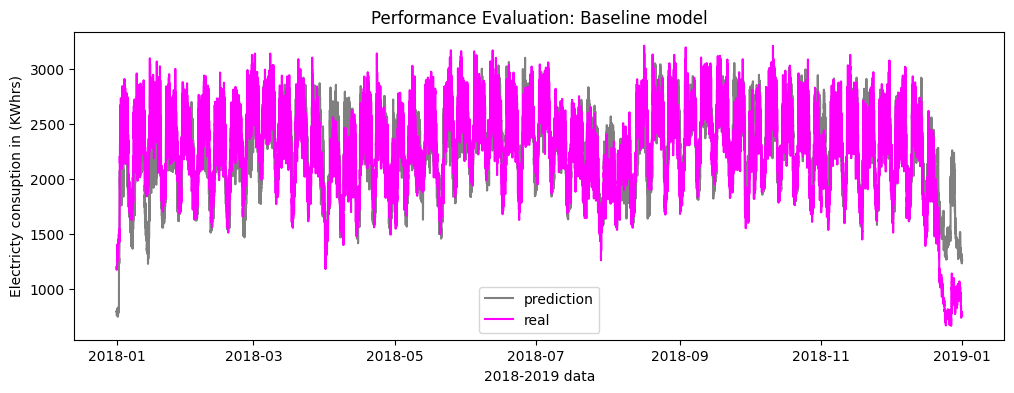

In [77]:
# Plotting the baseline model:
plt.figure(figsize = (12, 4))
# Plot the baseline model predictions using 2018 data
plt.plot(df.loc["2018-01-01 00:00:00":]['prediction'],
                 color = "gray", label = "prediction")

plt.plot(df.loc["2018-01-01 00:00:00":]
 ['measurement'], color = "fuchsia", label = "real")
plt.title("Performance Evaluation: Baseline model")
plt.xlabel("2018-2019 data")
plt.ylabel("Electricty consuption in (KWhrs)")
plt.legend(loc = "best")
plt.show()

In [78]:
# EDA

In [79]:
# Focus on the measurement column
ts = df['measurement']

In [80]:
# Ensure 15-minute frequency
ts = ts.asfreq('15min')

In [81]:
ts.head(2)

,measurement
date,
2015-12-31 23:45:00,593.548667
2016-01-01 00:00:00,600.781583


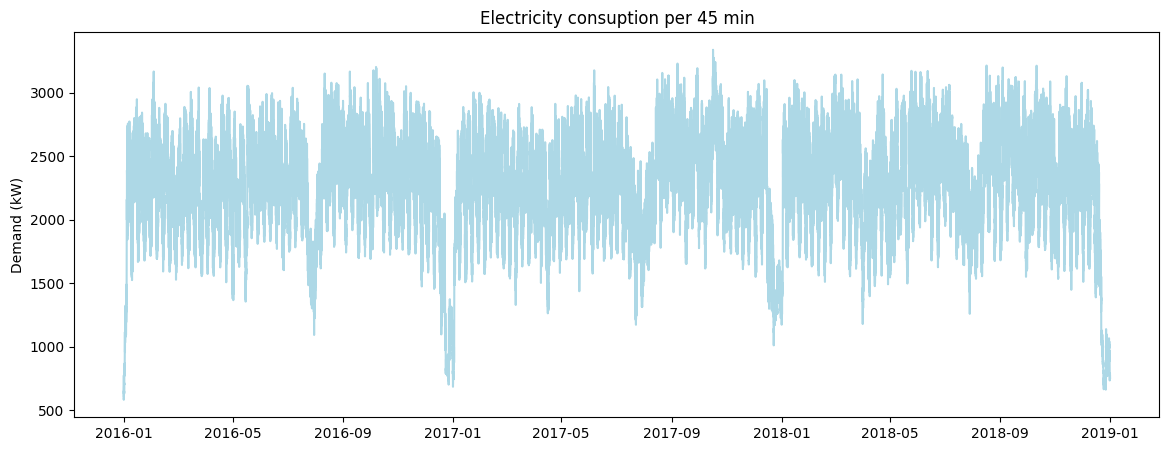

In [82]:
# Vizualize the raw series:
plt.figure(figsize=(14,5))
plt.plot(ts, color = "lightblue")
plt.title("Electricity consuption per 45 min")
#ts.plot(title='Electricity Demand Time Series', color)
plt.ylabel("Demand (kW)")
plt.grid(False)
plt.show()

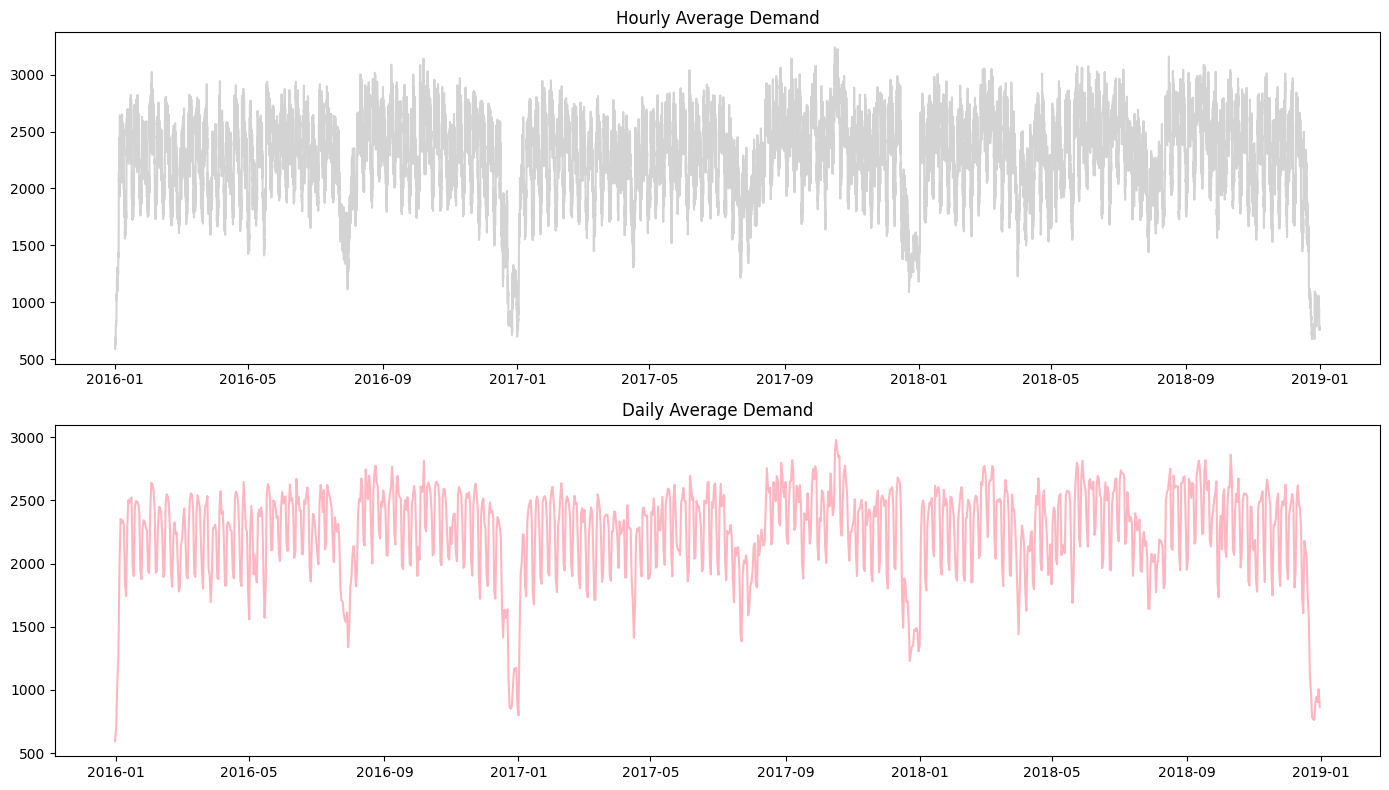

In [83]:
#  Resample and visualize trends [For smoothing--> rectifying]
ts_hourly = ts.resample('h').mean() # Hourly
ts_daily = ts.resample('D').mean() # Daily

fig, axs = plt.subplots(2, 1, figsize=(14,8))
axs[0].plot(ts_hourly, color = "lightgray")
axs[1].plot(ts_daily, color = "lightpink")
axs[0].set_title("Hourly Average Demand")
axs[1].set_title("Daily Average Demand")
plt.tight_layout()
plt.show()

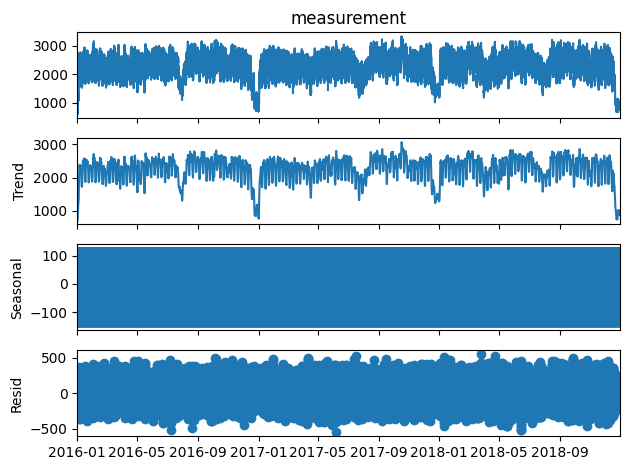

In [85]:
# Decompose[trend+seasonal + noise] (optional, only if seasonal_decompose available)
decomposition = seasonal_decompose(ts, model='additive', period=96)  # 96 = 1 day of 15-min data
# Plotting the decomposed components
decomposition.plot()
plt.show()

In [86]:
# Ensure stationarity: Test using ADF

result = adfuller(ts.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -13.95281475044304
p-value: 4.6687130131299473e-26


In [87]:
#In case of non-stationary data
# Differencing is needed
#ts_diff = ts.diff().dropna()#---> No need , the TS is stationary

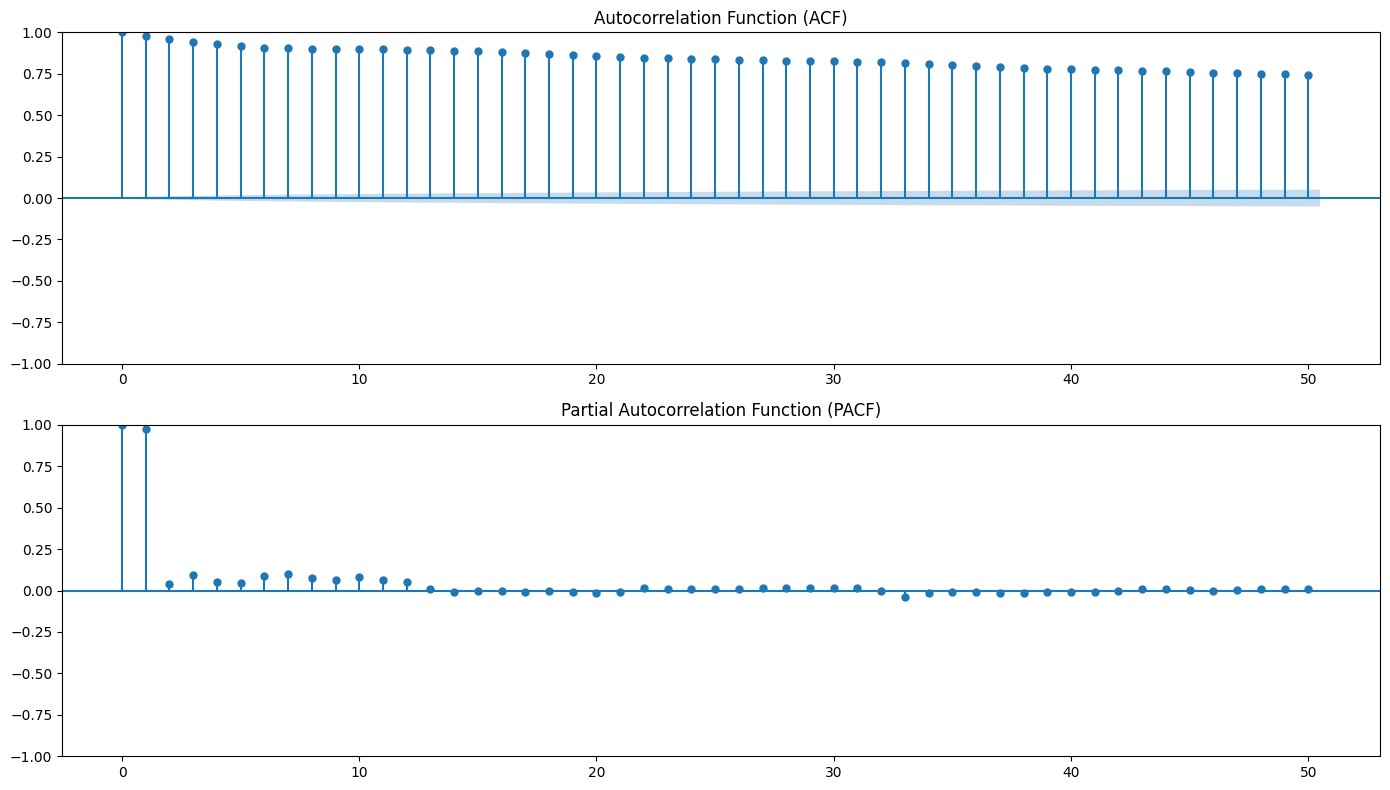

In [88]:
# Determine the order of ARMA (p,d = 0,  q)
fig, axs = plt.subplots(2, 1, figsize=(14, 8))  # Wider and taller
plot_acf(ts, lags=50, ax=axs[0])
axs[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(ts, lags=50, ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [89]:
# The order of MA--> ACF, AR---> PACF (Great variations can be seen): TODO--> Change p and q for different models

In [90]:
# Train-test split (forecasting 2 days = 192 steps)
train = ts.loc[:"2017-12-31 23:45:00"]
test = ts.loc["2018-01-01 00:00:00":]

In [91]:
#  Fit ARIMA model (example: p=2, d=0, q=2; tune this)
model = ARIMA(train, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            measurement   No. Observations:                70177
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -407371.866
Date:                Tue, 27 May 2025   AIC                         814755.732
Time:                        20:42:04   BIC                         814810.685
Sample:                    12-31-2015   HQIC                        814772.679
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2239.6972     31.687     70.682      0.000    2177.592    2301.803
ar.L1          1.6957      0.007    237.137      0.000       1.682       1.710
ar.L2         -0.6968      0.007    -98.227      0.0

In [92]:
# Forecasting
forecast = model_fit.forecast(steps=192)

In [93]:
# Evaluation
rmse = np.sqrt(mean_squared_error(test[:192], forecast))
mae = mean_absolute_error(test[:192], forecast)
mape = np.mean(np.abs((test[:192] - forecast) / test)) * 100

In [94]:
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 445.64
MAE: 307.80
MAPE: 14.23%


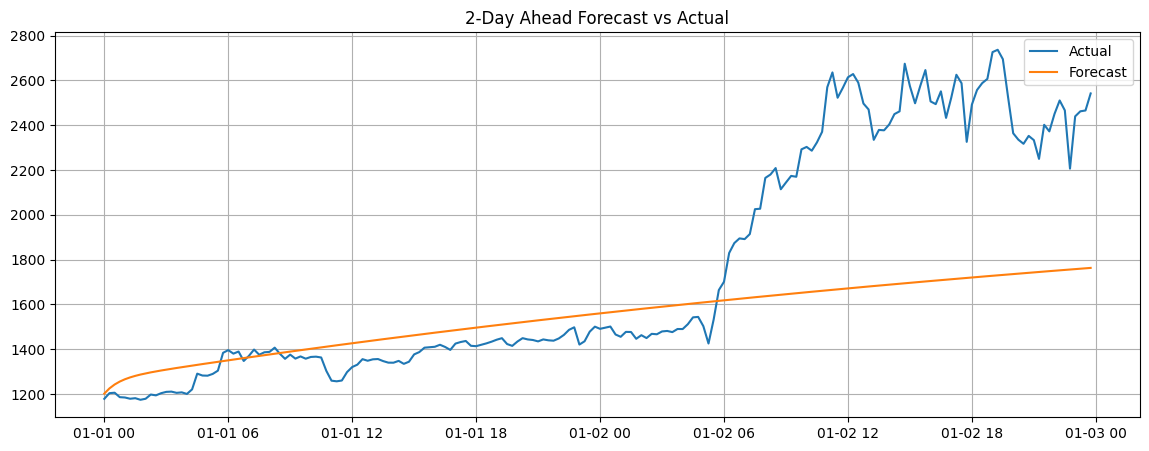

In [95]:
# Plot forecast vs actual
plt.figure(figsize=(14,5))
plt.plot(test[:192].index, test[:192], label='Actual')
plt.plot(test[:192].index, forecast, label='Forecast')
plt.title("2-Day Ahead Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# Fitting SARIMA



In [97]:
# Defining  and fitting SARIMA the model [Take a lot of time...try @ home]
# model = SARIMAX(ts,
#                 order=(2, 0, 2),       # non-seasonal p, d, q
#                 seasonal_order=(1, 1, 1, 96),  # seasonal P, D, Q, s
#                 enforce_stationarity=False,
#                 enforce_invertibility=False)
# results = model.fit()
# print(results.summary())

In [98]:
# # 2 -days ahead forecasting:
# forecast = results.get_forecast(steps=96)
# forecast_ci = forecast.conf_int()


In [98]:
# NOTE!!!!Classical TS are not apprpriate for this data: Swap with the data of your interest and follow the same proc to fit TS models